# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns
import time

np.random.seed(0)

#Data Loading

In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


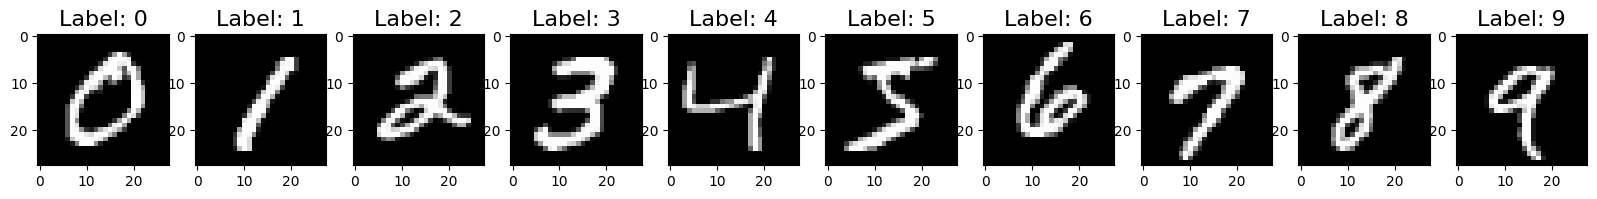

In [4]:
#visualizing the dataset
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)
     

In [5]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [6]:
for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


#Data Preparation

In [7]:
# Normalization of data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [8]:
# Reshape the data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


#Creating the model

In [9]:
model = Sequential()

model.add(Dense(units=784, input_shape=(784,), activation='relu'))
model.add(Dense(units=200, activation='relu'))
model.add(Dense(units=50, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 784)               615440    
                                                                 
 dense_1 (Dense)             (None, 200)               157000    
                                                                 
 dense_2 (Dense)             (None, 50)                10050     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                510       
                                                                 
Total params: 783,000
Trainable params: 783,000
Non-trainable params: 0
_________________________________________________________________


#Training

In [10]:
batch_size = 512
epochs=10
start_time = time.time()
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)
train_time = time.time() - start_time
print("The training time is ", train_time," seconds")

Epoch 1/10
118/118 [==============================] - 4s 26ms/step - loss: 0.5084 - accuracy: 0.8501
Epoch 2/10
118/118 [==============================] - 3s 26ms/step - loss: 0.1561 - accuracy: 0.9564
Epoch 3/10
118/118 [==============================] - 4s 31ms/step - loss: 0.1113 - accuracy: 0.9700
Epoch 4/10
118/118 [==============================] - 3s 27ms/step - loss: 0.0815 - accuracy: 0.9768
Epoch 5/10
118/118 [==============================] - 3s 27ms/step - loss: 0.0704 - accuracy: 0.9808
Epoch 6/10
118/118 [==============================] - 3s 28ms/step - loss: 0.0638 - accuracy: 0.9809
Epoch 7/10
118/118 [==============================] - 4s 30ms/step - loss: 0.0529 - accuracy: 0.9845
Epoch 8/10
118/118 [==============================] - 3s 26ms/step - loss: 0.0494 - accuracy: 0.9853
Epoch 9/10
118/118 [==============================] - 3s 27ms/step - loss: 0.0450 - accuracy: 0.9867
Epoch 10/10
118/118 [==============================] - 4s 31ms/step - loss: 0.0412 - accura

#Testing

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.1190 - accuracy: 0.9748
Test Loss: 0.11898624151945114, Test Accuracy: 0.9747999906539917


In [12]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

313/313 [==============================] - 1s 2ms/step
[[1.01340526e-13 1.04401964e-17 6.66958188e-13 ... 9.99999940e-01
  2.01922226e-16 4.70846206e-09]
 [4.58745434e-18 3.77820370e-18 9.99999940e-01 ... 1.90455591e-15
  2.92365174e-16 2.75604198e-19]
 [5.21998200e-12 9.99999940e-01 1.17664756e-09 ... 9.73080194e-09
  2.54037005e-08 1.30766487e-09]
 ...
 [1.19449397e-23 5.08661527e-13 3.12262200e-20 ... 7.69872040e-14
  2.48838957e-16 5.19472021e-10]
 [8.84890661e-15 2.99113059e-19 1.11041374e-22 ... 1.28887674e-18
  1.99253170e-10 2.90810433e-14]
 [2.00846145e-10 3.25000617e-12 8.11162877e-13 ... 1.72375126e-17
  1.93052969e-08 1.12508509e-11]]
[7 2 1 ... 4 5 6]


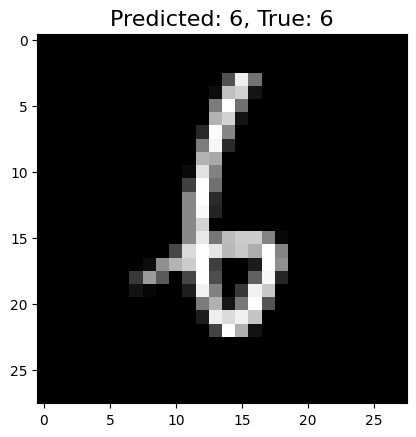

In [13]:
# Visualize for one example
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

#Confusion Matrix

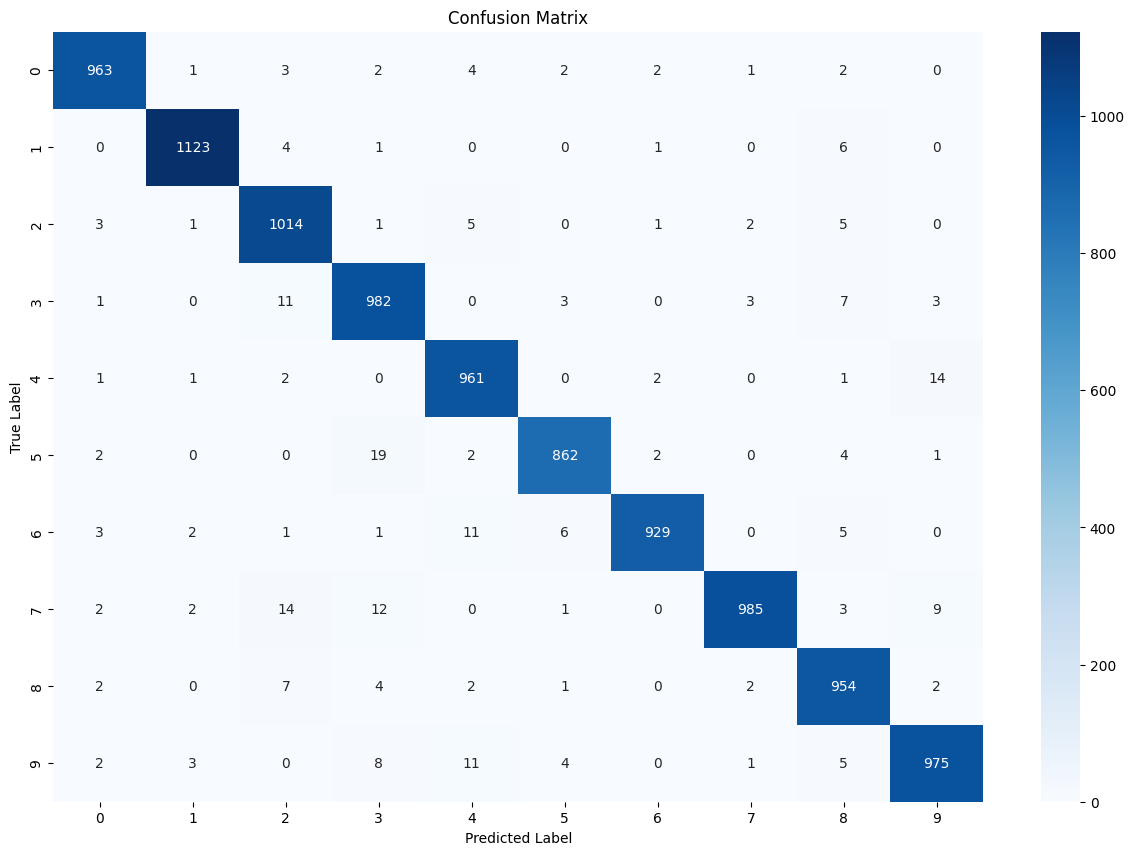

In [14]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');